In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


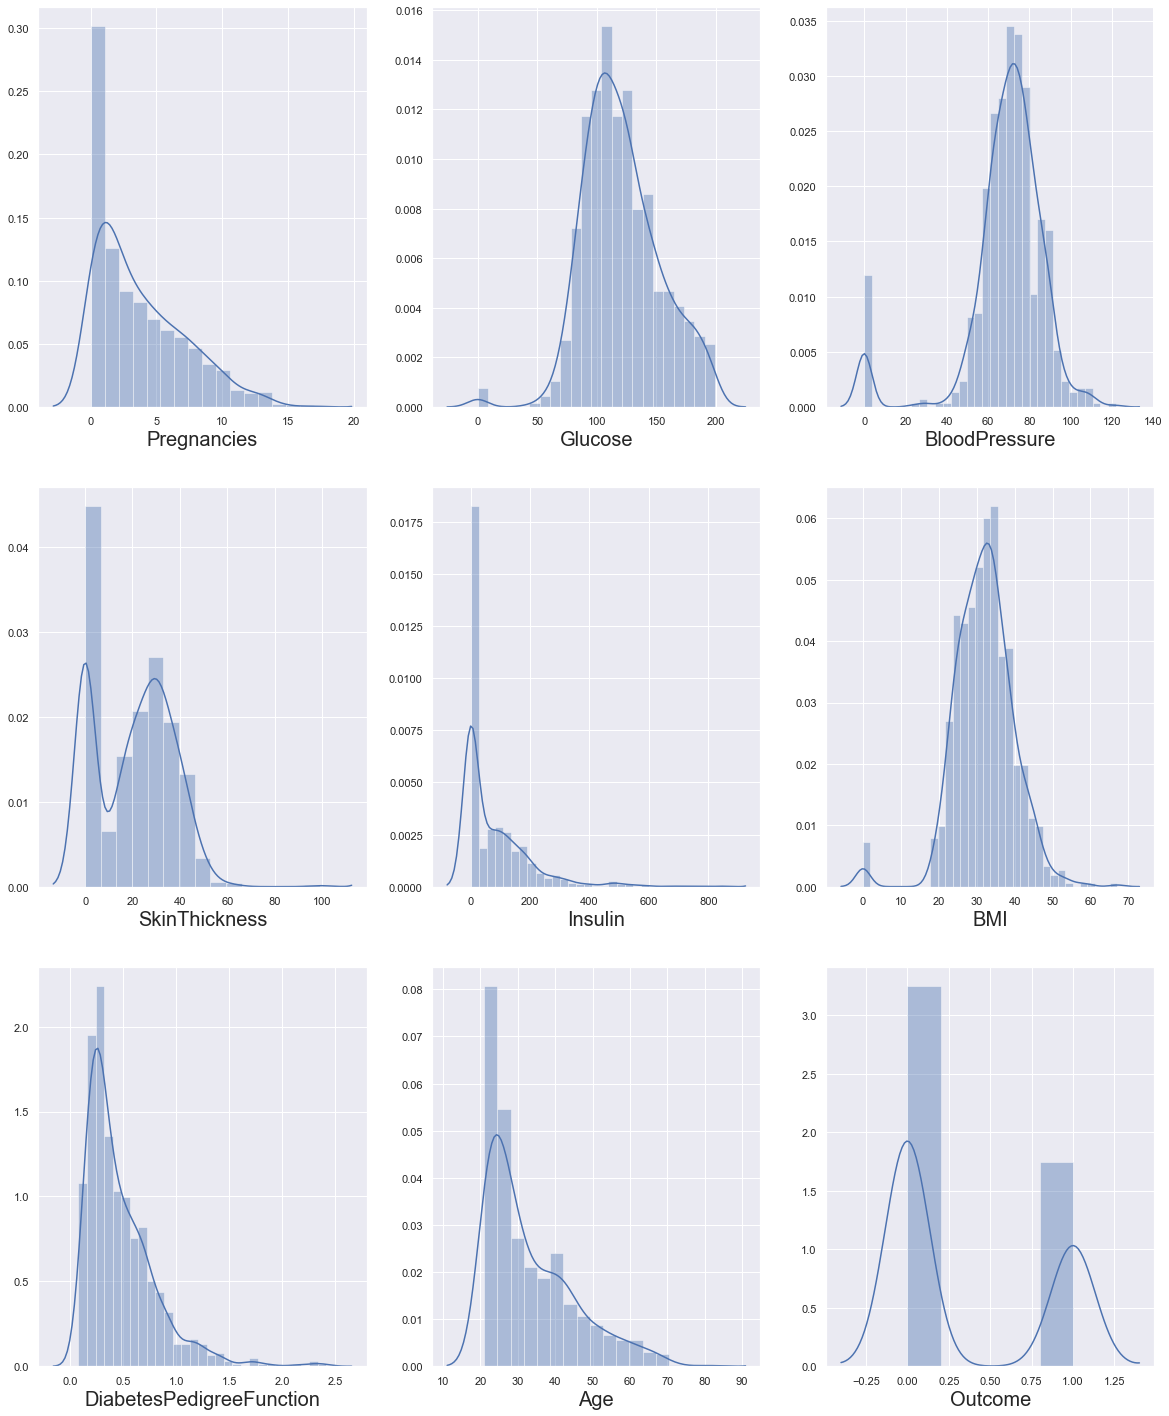

In [4]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [8]:
(data == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [13]:
(data == 0).sum(axis=0)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

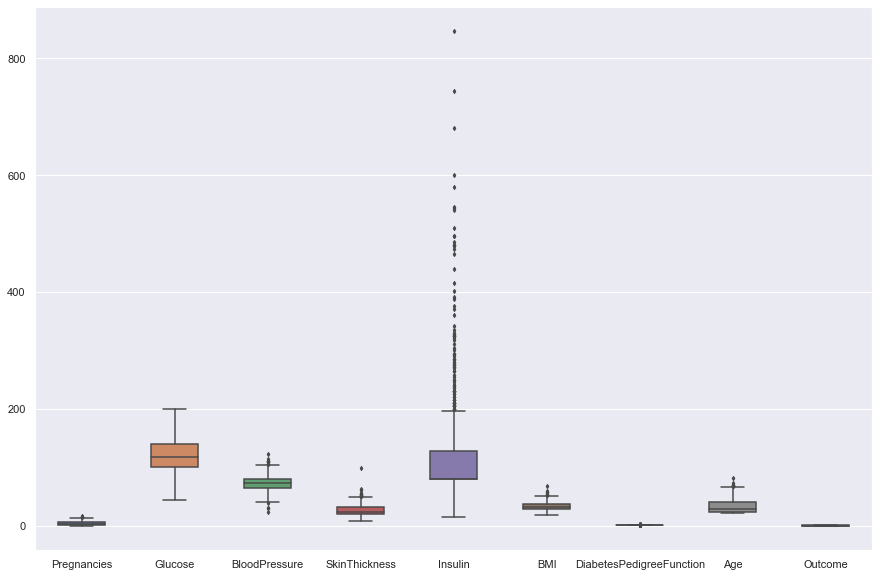

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [15]:
q = data['Pregnancies'].quantile(0.98)
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

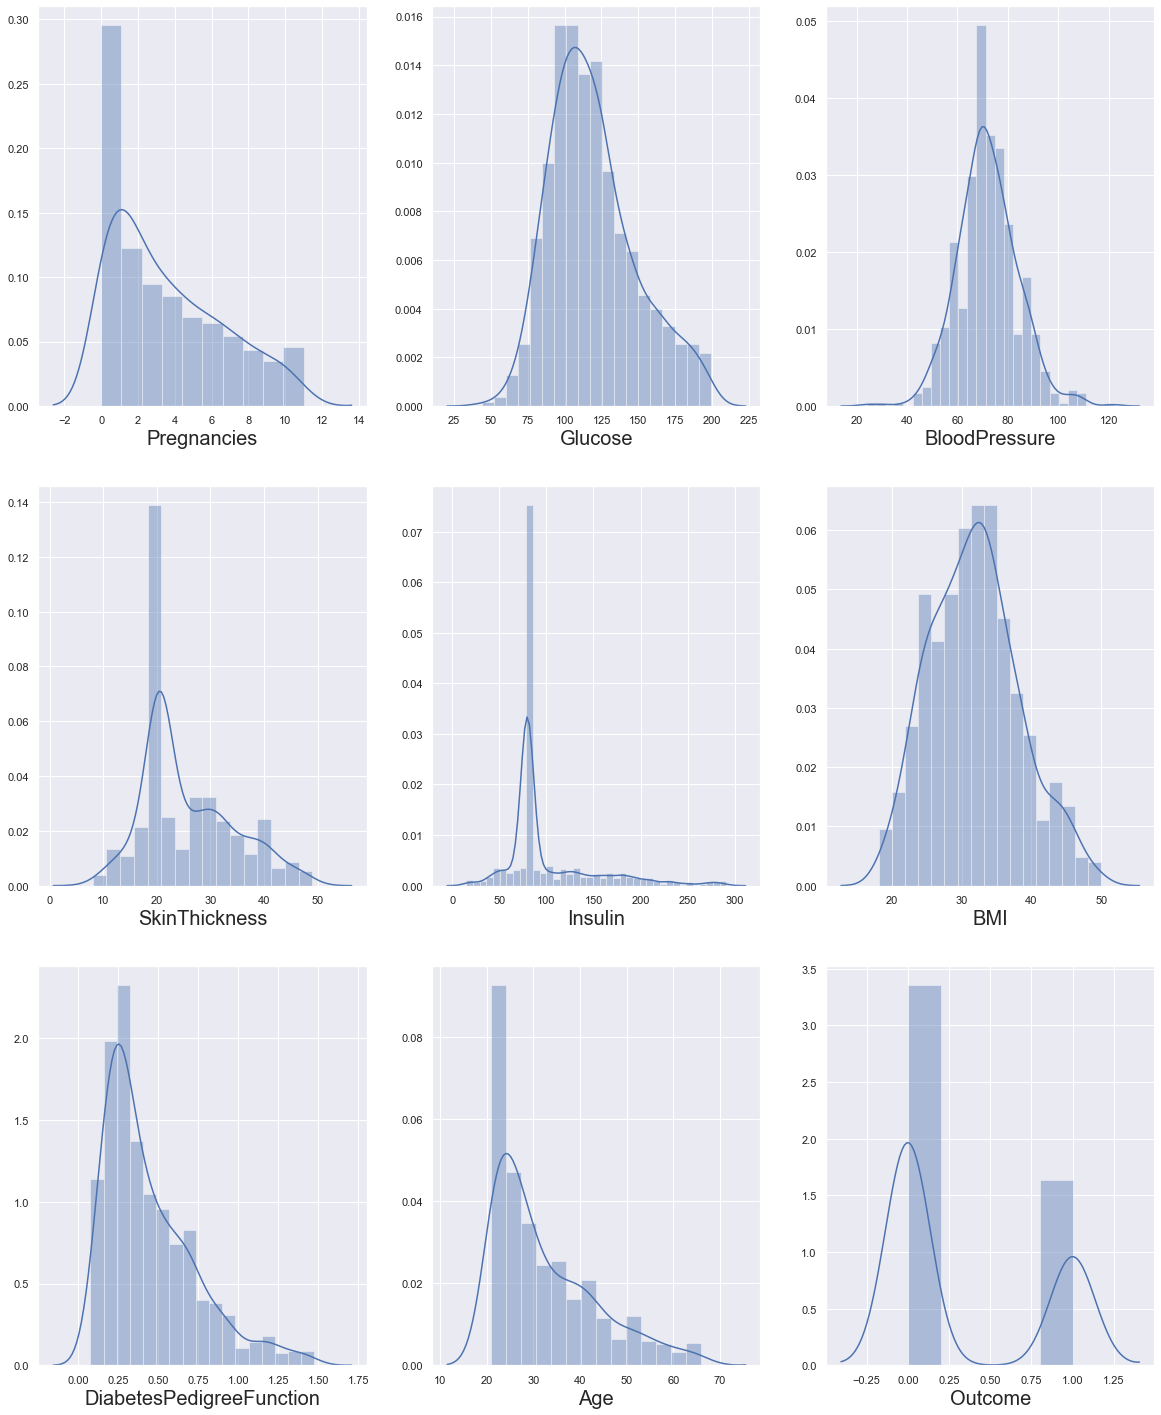

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [18]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

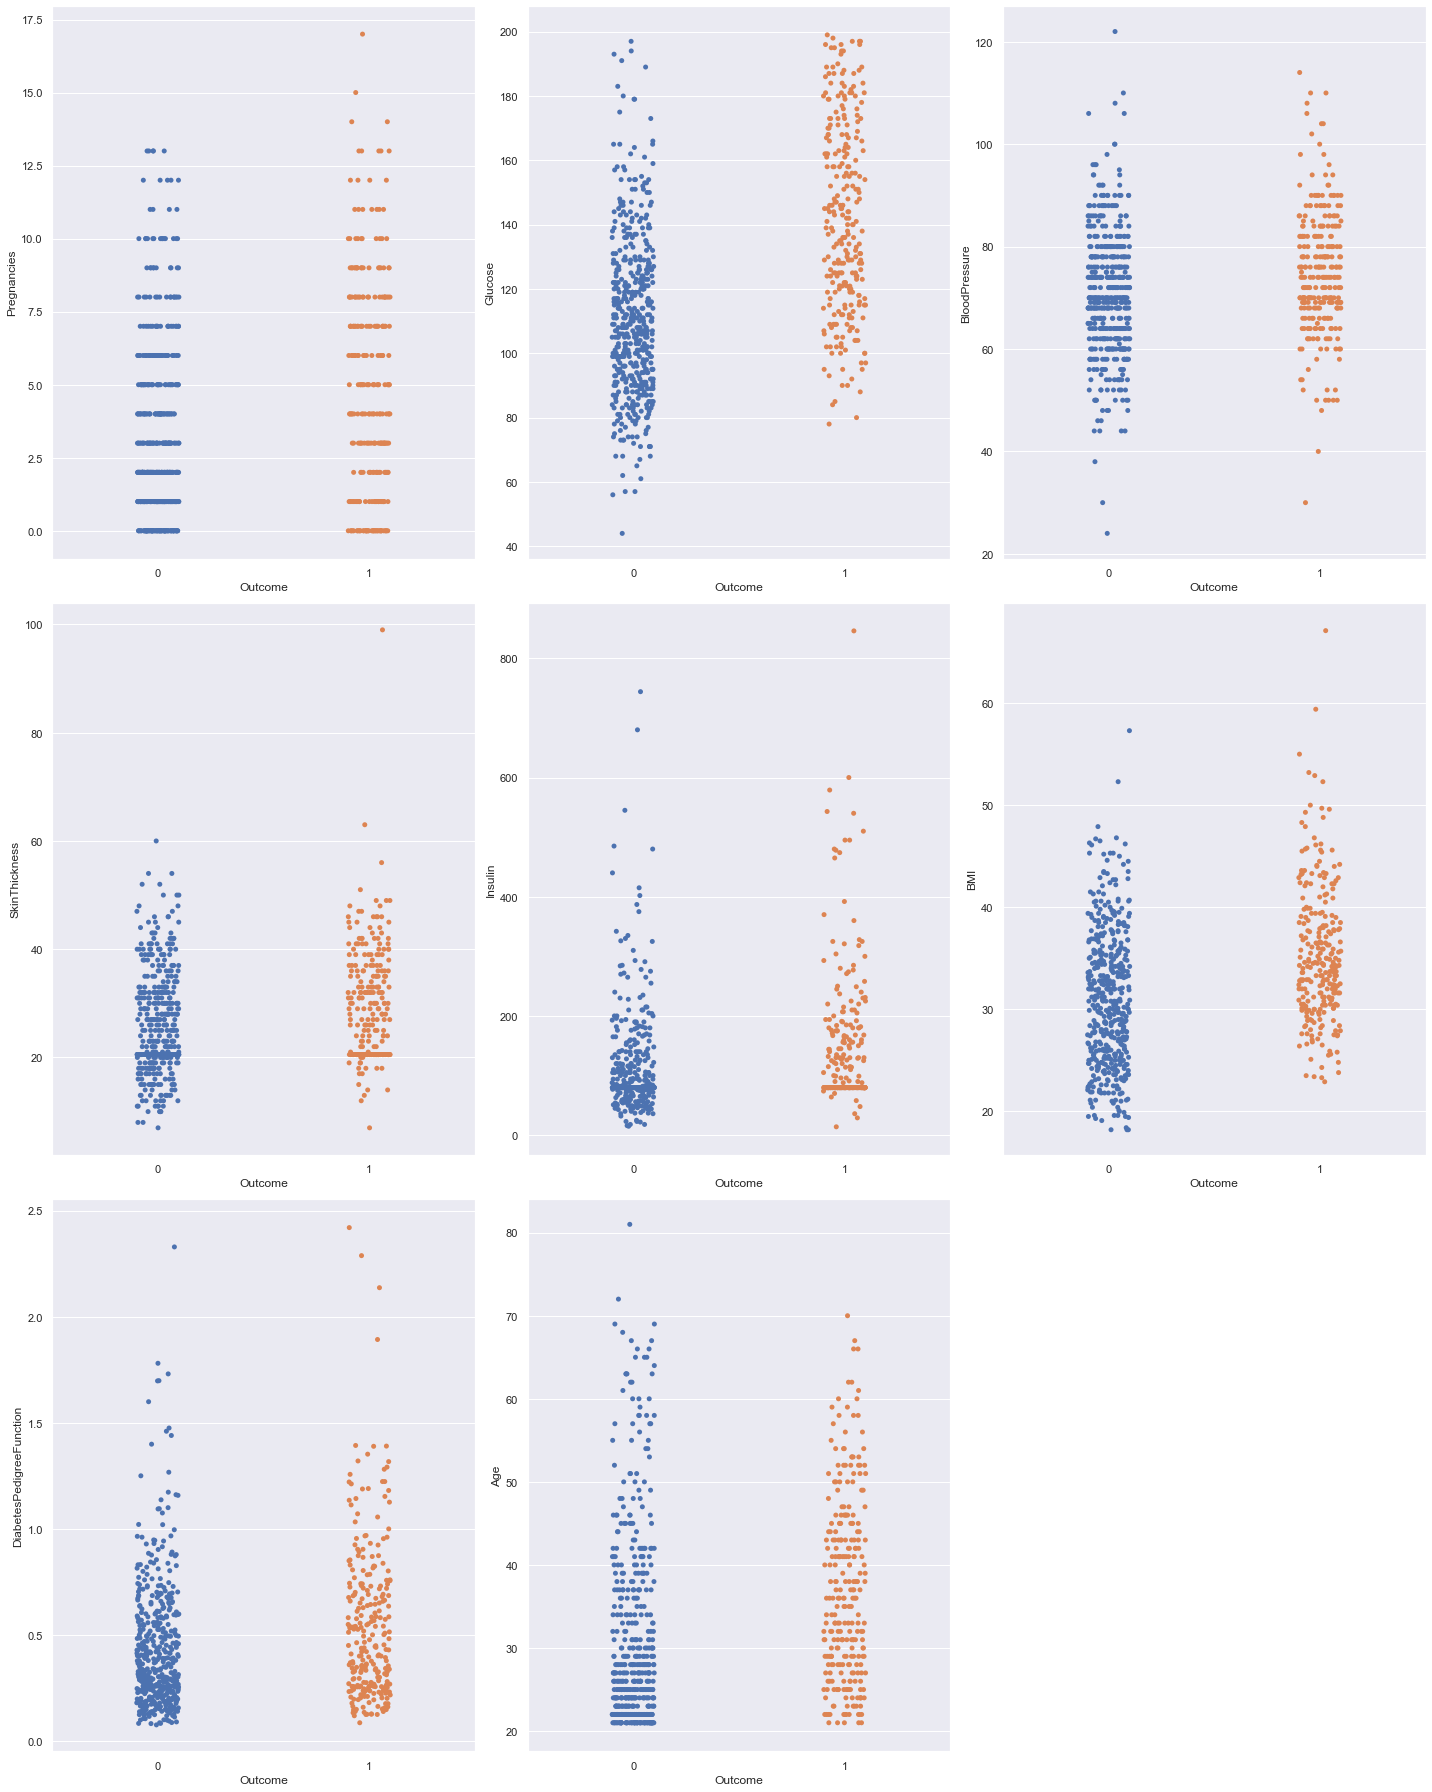

In [19]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [20]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [22]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [23]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [24]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
y_pred = knn.predict(x_test)

In [26]:
knn.score(x_train,y_train)

0.8177083333333334

In [27]:
knn.score(x_test,y_test)

0.75

In [28]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [29]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [30]:
gridsearch.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 168 candidates, totalling 504 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.694, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.724, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.764, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.705, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.766, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.796, total=   0.0s
[CV] algorith

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=12, score=0.729, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=12, score=0.796, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.750, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.796, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=3, score=0.694, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=3, score=0.724, to

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.750, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.770, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.715, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.724, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.770, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.746, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.750, to

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.796, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=13, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=13, score=0.750, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=13, score=0.796, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.694, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.724, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.764, total=   0.0s
[CV

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=7, score=0.699, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=7, score=0.766, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=7, score=0.780, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.725, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.750, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.770, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=10, score=0.715, total=   0.0s
[CV] a

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.750, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.785, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.741, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.729, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.796, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.750, total=   0.0s


[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, score=0.699, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, score=0.766, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, score=0.780, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, score=0.725, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, score=0.750, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, score=0.770, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.715, total=   0.0s
[CV] algorithm=brute

[CV] algorithm=brute, leaf_size=27, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=13, score=0.796, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.694, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.724, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.764, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, score=0.705, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, score=0.766, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_

[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.796, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=7, score=0.699, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=7, score=0.766, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=7, score=0.780, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=9, score=0.725, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=9, score=0.750, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=9, score=0.770, total=   0.0s
[CV] algorithm=brute,

[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed:    6.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [31]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 13}

In [32]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)

In [33]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [34]:
knn.score(x_train,y_train)

0.7986111111111112

In [35]:
knn.score(x_test,y_test)

0.75

In [36]:
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(X_scaled)

12

In [42]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1.
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

Average train score is :   0.7959280303030303
Average test score is :   0.7552083333333334


([<matplotlib.axis.YTick at 0x2240c6e0088>,
 <a list of 7 Text yticklabel objects>)

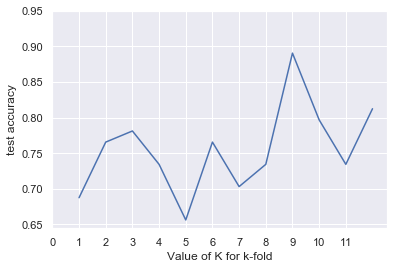

In [43]:
plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 